# Apprentissage Semi-Supervisé

On se propose dans ce TP d'illustrer certains techniques d'apprentissage semi-supervisé vues en cours.

Dans tout ce qui suit, on considère que l'on dispose d'un ensemble de données $x_{lab}$ labellisées et d'un ensemble de donnés $x_{unlab}$ non labellisées.

## Datasets

Commencez par exécuter ces codes qui vos permettront de charger les datasets que nous allons utiliser et de les partager en données labellisées et non labellisées, ainsi qu'en données de test.

### Dataset des deux clusters

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 

def generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_blobs(n_samples=[round(num_samples/2), round(num_samples/2)], n_features=2, center_box=(- 3, 3), random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


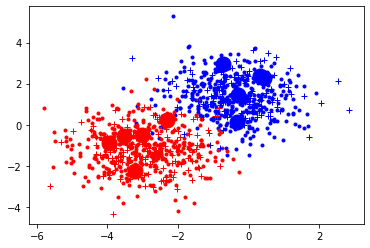

In [2]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

### Dataset des 2 lunes


<img src="https://drive.google.com/uc?id=1xb_gasBJ6sEmbyvCWTnVEAsbspyDCyFL">
<caption><center> Figure 1: Comparaison de différents algorithmes semi-supervisés sur le dataset des 2 lunes</center></caption>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 

def generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_moons(n_samples=num_samples, noise=0.1, random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


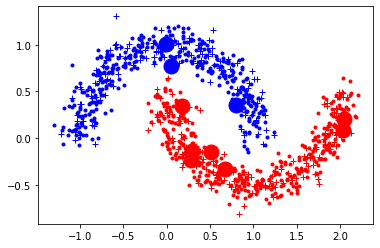

In [4]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

## Modèles

Nous allons dès maintenant préparer les modèles que nous utiliserons dans la suite.

**Travail à faire** Complétez les modèles ci-dessous : 

Pour le dataset des 2 clusters, un simple perceptron monocouche suffira :

In [23]:
from keras.layers import Input, Dense
from keras.models import Model

# Ici, écrire un simple perceptron monocouche
def create_model_2clusters():

  inputs = Input(shape=(2,))

  outputs = Dense(1, activation='sigmoid')(inputs)

  model = Model(inputs=inputs, outputs=outputs)  

  return model

Pour le dataset des 2 lunes, implémentez un perceptron multi-couches à une couche cachée, par exemple de 20 neurones.

In [22]:
# Ici, écrire un perceptron multi-couches à une seule couche cachée comprenant 20 neurones
def create_model_2moons():

  inputs = Input(shape=(2,))

  inter = Dense(20, activation="relu")(inputs)  

  outputs = Dense(1, activation="sigmoid")(inter)
  
  model = Model(inputs=inputs, outputs=outputs)  

  return model

## Apprentissage supervisé

Commencez par bien lire le code ci-dessous, qui vous permet de mettre en place un apprentissage supervisé en détaillant la boucle d'apprentissage. Cela nous permettra d'avoir plus de contrôle dans la suite pour implémenter les algorithmes semi-supervisés. Cela vous fournira également une base contre laquelle comparer les algorithmes semi-supervisés.

En quelques mots, le code est organisé autour d'une double boucle : une sur les *epochs*, et la 2nde sur les *mini-batches*.

Pour chaque nouveau batch de données, on réalise la succession d'étapes suivantes dans un bloc **GradientTape** qui permet le calcul automatique des gradients :     


1.   Prédiction de la sortie du modèle sur les données du batch
2.   Calcul de la fonction de perte entre sortie du réseau et labels réels associés aux élements du batch
3.   Calcul des gradients de la perte par rapport aux paramètres du réseau (par différentiation automatique)
4.   Mise à jour des paramètres grâce aux gradients calculés. 



### Dataset des 2 clusters

In [31]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2clusters()

# Hyperparamètres de l'apprentissage
epochs = 200
batch_size = 32
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices) 

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()      

Epoch    0 : Loss : 1.5559, Acc : 0.1000, Test Acc : 0.0560
Epoch    1 : Loss : 1.5317, Acc : 0.1000, Test Acc : 0.0520
Epoch    2 : Loss : 1.5078, Acc : 0.1000, Test Acc : 0.0520
Epoch    3 : Loss : 1.4840, Acc : 0.1000, Test Acc : 0.0480
Epoch    4 : Loss : 1.4604, Acc : 0.1000, Test Acc : 0.0440
Epoch    5 : Loss : 1.4371, Acc : 0.0000, Test Acc : 0.0400
Epoch    6 : Loss : 1.4139, Acc : 0.0000, Test Acc : 0.0400
Epoch    7 : Loss : 1.3910, Acc : 0.0000, Test Acc : 0.0400
Epoch    8 : Loss : 1.3683, Acc : 0.0000, Test Acc : 0.0440
Epoch    9 : Loss : 1.3459, Acc : 0.0000, Test Acc : 0.0440
Epoch   10 : Loss : 1.3237, Acc : 0.0000, Test Acc : 0.0480
Epoch   11 : Loss : 1.3018, Acc : 0.0000, Test Acc : 0.0480
Epoch   12 : Loss : 1.2802, Acc : 0.0000, Test Acc : 0.0480
Epoch   13 : Loss : 1.2588, Acc : 0.0000, Test Acc : 0.0480
Epoch   14 : Loss : 1.2377, Acc : 0.0000, Test Acc : 0.0480
Epoch   15 : Loss : 1.2169, Acc : 0.0000, Test Acc : 0.0480
Epoch   16 : Loss : 1.1964, Acc : 0.0000

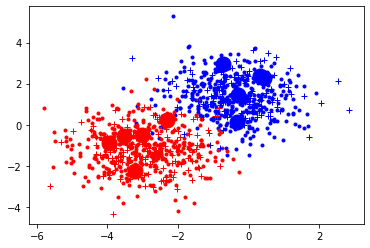

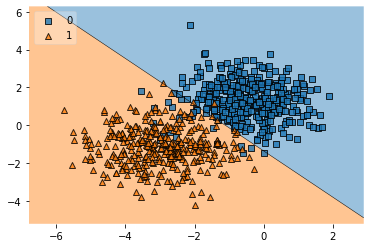

In [32]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

### Dataset des 2 lunes

**Travail à faire** : Mettez en place le même apprentissage pour le dataset des 2 lunes. 

In [35]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2moons()

# Hyperparamètres de l'apprentissage
epochs = 200
batch_size = 32
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices) 

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()      

Epoch    0 : Loss : 0.6756, Acc : 0.7000, Test Acc : 0.7200
Epoch    1 : Loss : 0.6550, Acc : 0.9000, Test Acc : 0.7560
Epoch    2 : Loss : 0.6354, Acc : 0.9000, Test Acc : 0.7600
Epoch    3 : Loss : 0.6172, Acc : 0.8000, Test Acc : 0.8000
Epoch    4 : Loss : 0.6000, Acc : 0.8000, Test Acc : 0.8120
Epoch    5 : Loss : 0.5837, Acc : 0.8000, Test Acc : 0.8200
Epoch    6 : Loss : 0.5677, Acc : 0.8000, Test Acc : 0.8280
Epoch    7 : Loss : 0.5520, Acc : 0.8000, Test Acc : 0.8360
Epoch    8 : Loss : 0.5363, Acc : 0.8000, Test Acc : 0.8360
Epoch    9 : Loss : 0.5205, Acc : 0.8000, Test Acc : 0.8360
Epoch   10 : Loss : 0.5050, Acc : 0.8000, Test Acc : 0.8400
Epoch   11 : Loss : 0.4898, Acc : 0.8000, Test Acc : 0.8400
Epoch   12 : Loss : 0.4749, Acc : 0.8000, Test Acc : 0.8440
Epoch   13 : Loss : 0.4607, Acc : 0.8000, Test Acc : 0.8440
Epoch   14 : Loss : 0.4475, Acc : 0.8000, Test Acc : 0.8400
Epoch   15 : Loss : 0.4347, Acc : 0.8000, Test Acc : 0.8360
Epoch   16 : Loss : 0.4223, Acc : 0.8000

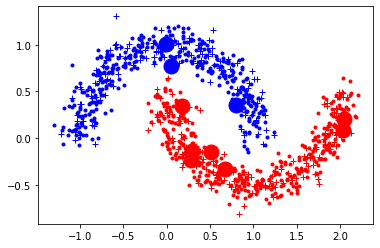

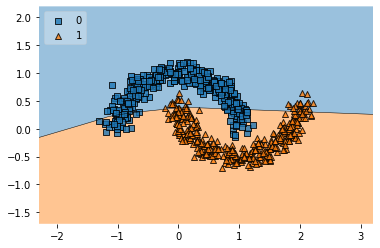

In [36]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

# Minimisation de l'entropie

Nous allons dans cette partie mettre en place le mécanisme de minimisation d'entropie, conjointement à la minimisation de l'entropie croisée.

Pour commencer, implémentez la fonction de coût qui calcule l'entropie $H$ des prédictions du réseau $\hat{y}$ :
$$ H(\hat{y}) = - ∑_{i=1}^N \hat{y}_i log(\hat{y}_i) $$

Pour les exemples simples des datasets des 2 clusters et des 2 lunes, il faut implémenter une entropie binaire ! (plus tard, sur MNIST, il faudra implémenter une version multi-classe de l'entropie)

In [37]:
import tensorflow as tf

# Calcul de l'entropie de y_pred
def binary_entropy_loss(y_pred):
    return -tf.reduce_sum(y_pred * tf.math.log(y_pred))

**Travail à faire** : Reprenez maintenant la boucle d'apprentissage supervisé et introduisez la minimisation d'entropie pour régulariser l'apprentissage.

La difficulté principale va être l'introduction des données non labellisées dans la boucle. Ainsi, un batch devra maintenant être composé de données labellisées et non labellisées. Je vous suggère de conserver le même nombre de données labellisées par batch que précédemment (i.e. 16) et de prendre un plus grand nombre de données non labellisées, par exemple 90.

N'oubliez pas également d'introduire un hyperparamètre λ pour contrôler l'équilibre entre perte supervisée et non supervisée. Utilisez un λ constant dans un premier temps, et testez ensuite des variantes qui consisteraient à augmenter progressivement sa valeur au fil des epochs. 

La fonction objectif à minimiser aura donc la forme :    
$$  J = \sum_{(x,y) \in \mathcal{L}} CE(y, \hat{y}) + \lambda \sum_{x \in \mathcal{U}} H(\hat{y})	$$

In [188]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab=10, num_unlab=90, num_test=50)
model = create_model_2moons()

# Hyperparamètres de l'apprentissage
lambdaa = 0.25
epochs = 200
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])
indices_unlab = np.arange(x_train_unlab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)
  np.random.shuffle(indices_unlab)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    x_batch_unlab = x_train_unlab[indices_unlab[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch
      y_pred_unlab = model(x_batch_unlab, training=True)

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred) + lambdaa * binary_entropy_loss(y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()

Epoch    0 : Loss : 1.5490, Acc : 0.7000, Test Acc : 0.7800
Epoch    1 : Loss : 1.5385, Acc : 0.7000, Test Acc : 0.8000
Epoch    2 : Loss : 1.5271, Acc : 0.7000, Test Acc : 0.8600
Epoch    3 : Loss : 1.5151, Acc : 0.7000, Test Acc : 0.8800
Epoch    4 : Loss : 1.5028, Acc : 0.7000, Test Acc : 0.8800
Epoch    5 : Loss : 1.4902, Acc : 0.7000, Test Acc : 0.8800
Epoch    6 : Loss : 1.4767, Acc : 0.7000, Test Acc : 0.8800
Epoch    7 : Loss : 1.4626, Acc : 0.7000, Test Acc : 0.8800
Epoch    8 : Loss : 1.4474, Acc : 0.7000, Test Acc : 0.8800
Epoch    9 : Loss : 1.4315, Acc : 0.7000, Test Acc : 0.8800
Epoch   10 : Loss : 1.4145, Acc : 0.7000, Test Acc : 0.8800
Epoch   11 : Loss : 1.3964, Acc : 0.7000, Test Acc : 0.8800
Epoch   12 : Loss : 1.3772, Acc : 0.7000, Test Acc : 0.8800
Epoch   13 : Loss : 1.3567, Acc : 0.7000, Test Acc : 0.8800
Epoch   14 : Loss : 1.3348, Acc : 0.7000, Test Acc : 0.8800
Epoch   15 : Loss : 1.3121, Acc : 0.7000, Test Acc : 0.8800
Epoch   16 : Loss : 1.2887, Acc : 0.7000

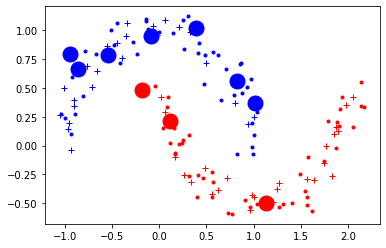

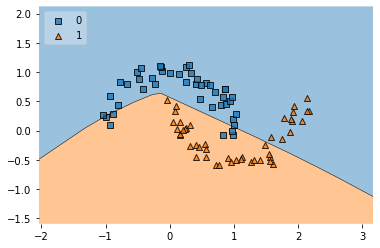

In [189]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

In [113]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab=10, num_unlab=90, num_test=90)
model = create_model_2clusters()

# Hyperparamètres de l'apprentissage
epochs = 200
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])
indices_unlab = np.arange(x_train_unlab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  if epoch > 50:
    lambdaa = 0.25
  else:
    lambdaa = 0

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)
  np.random.shuffle(indices_unlab)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    x_batch_unlab = x_train_unlab[indices_unlab[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch
      y_pred_unlab = model(x_batch_unlab, training=True)

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred) + lambdaa * binary_entropy_loss(y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()

Epoch    0 : Loss : 0.4852, Acc : 0.7000, Test Acc : 0.6111
Epoch    1 : Loss : 0.4787, Acc : 0.7000, Test Acc : 0.6444
Epoch    2 : Loss : 0.4723, Acc : 0.7000, Test Acc : 0.6444
Epoch    3 : Loss : 0.4660, Acc : 0.7000, Test Acc : 0.6444
Epoch    4 : Loss : 0.4598, Acc : 0.7000, Test Acc : 0.6556
Epoch    5 : Loss : 0.4537, Acc : 0.7000, Test Acc : 0.6667
Epoch    6 : Loss : 0.4478, Acc : 0.7000, Test Acc : 0.6667
Epoch    7 : Loss : 0.4420, Acc : 0.7000, Test Acc : 0.6667
Epoch    8 : Loss : 0.4363, Acc : 0.7000, Test Acc : 0.6667
Epoch    9 : Loss : 0.4307, Acc : 0.7000, Test Acc : 0.6667
Epoch   10 : Loss : 0.4252, Acc : 0.7000, Test Acc : 0.6667
Epoch   11 : Loss : 0.4199, Acc : 0.7000, Test Acc : 0.6778
Epoch   12 : Loss : 0.4147, Acc : 0.7000, Test Acc : 0.6889
Epoch   13 : Loss : 0.4095, Acc : 0.7000, Test Acc : 0.6889
Epoch   14 : Loss : 0.4045, Acc : 0.7000, Test Acc : 0.6889
Epoch   15 : Loss : 0.3996, Acc : 0.7000, Test Acc : 0.6889
Epoch   16 : Loss : 0.3948, Acc : 0.7000

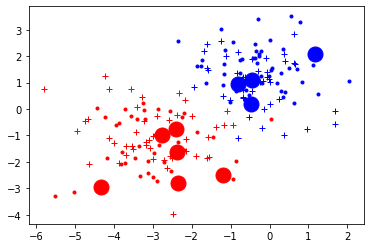

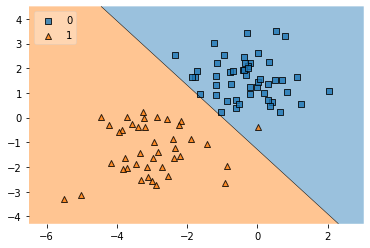

In [114]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

Une fois cette étape réalisée, vous pouvez tester l'algorithme sur le dataset des 2 lunes ; comme annoncé en cours, vous devriez avoir beaucoup de mal à faire fonctionner l'algorithme sur ces données.

S'il vous reste du temps, vous pouvez également tester votre algorithme sur les données MNIST, cela vous avancera pour la prochaine séance.

# MNIST

## Chargement des données


In [166]:
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

def generate_mnist_dataset(num_lab = 10, seed=10):

  # Chargement et normalisation (entre 0 et 1) des données de la base de données MNIST
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = np.expand_dims(x_train.astype('float32') / 255., 3)
  x_test = np.expand_dims(x_test.astype('float32') / 255., 3)

  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=(x_train.shape[0]-num_lab)/x_train.shape[0], random_state=seed)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test


In [184]:
# for i in range(1000, 10000):
#     x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_mnist_dataset(num_lab = 10, seed=i)
#     if len(set(y_train_lab)) >= 10:
#         print(i)
#         break

# print(y_train_lab)
# print(len(y_train_lab))
# print(set(y_train_lab))
# test = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# print(set(test))
# print(len(set(y_train_lab)))

# print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
# print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

[7 5 9 4 4 1 8 1 0 7]
[7 2 8 3 1 4 6 9 5 0]
[0 5 6 4 5 5 8 2 1 4]


## Définition du modèle

In [142]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Ici, on implémentera le modèle LeNet-5 :
def create_model_mnist():

  inputs = keras.Input(shape=(28, 28, 1,))

  # 1 couche de convolution 5x5 à 6 filtres suivie d'un max pooling
  x = Conv2D(6, 5, activation = 'relu')(inputs)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  # puis 1 couche de convolution 5x5 à 16 filtres suivie d'un max pooling
  x = Conv2D(16, 5, activation = 'relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  # et d'un Flatten
  x = Flatten()(x)

  # Enfin 2 couches denses de 120 et 84 neurones
  x = Dense(120, activation='relu')(x)
  x = Dense(84, activation='relu')(x)

  # avant la couche de sortie à 10 neurones.
  outputs = Dense(10, activation='softmax')(x)

  model = keras.Model(inputs=inputs, outputs=outputs)  

  return model

In [190]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_mnist_dataset(num_lab=10, seed=1164)
model = create_model_mnist()

# Hyperparamètres de l'apprentissage
epochs = 100
batch_size = 64
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
test_acc_metric = keras.metrics.SparseCategoricalAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])
indices_unlab = np.arange(x_train_unlab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  if epoch > 25:
    lambdaa = 0.2
  else:
    lambdaa = 0

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)
  np.random.shuffle(indices_unlab)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    x_batch_unlab = x_train_unlab[indices_unlab[step*batch_size: (step+1)*batch_size]]
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch
      y_pred_unlab = model(x_batch_unlab, training=True)

      # Calcul de la fonction de perte sur ce batch
      # print(y_batch)
      # print(y_pred)
      loss_value = loss_fn(y_batch, y_pred) + lambdaa * binary_entropy_loss(y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()

Epoch    0 : Loss : 2.3014, Acc : 0.1000, Test Acc : 0.1074
Epoch    1 : Loss : 2.2547, Acc : 0.3000, Test Acc : 0.1335
Epoch    2 : Loss : 2.2146, Acc : 0.4000, Test Acc : 0.1968
Epoch    3 : Loss : 2.1732, Acc : 0.6000, Test Acc : 0.2695
Epoch    4 : Loss : 2.1275, Acc : 0.7000, Test Acc : 0.3152
Epoch    5 : Loss : 2.0814, Acc : 0.8000, Test Acc : 0.3496
Epoch    6 : Loss : 2.0271, Acc : 0.8000, Test Acc : 0.3671
Epoch    7 : Loss : 1.9674, Acc : 0.8000, Test Acc : 0.3805
Epoch    8 : Loss : 1.9000, Acc : 0.8000, Test Acc : 0.3940
Epoch    9 : Loss : 1.8275, Acc : 0.8000, Test Acc : 0.4053
Epoch   10 : Loss : 1.7498, Acc : 0.9000, Test Acc : 0.4102
Epoch   11 : Loss : 1.6640, Acc : 0.9000, Test Acc : 0.4171
Epoch   12 : Loss : 1.5701, Acc : 0.9000, Test Acc : 0.4208
Epoch   13 : Loss : 1.4696, Acc : 0.9000, Test Acc : 0.4260
Epoch   14 : Loss : 1.3669, Acc : 0.9000, Test Acc : 0.4301
Epoch   15 : Loss : 1.2611, Acc : 0.9000, Test Acc : 0.4359
Epoch   16 : Loss : 1.1529, Acc : 0.9000